#                                    Business Analystics (Assignment 1)

## Exploratory Data Analysis

#### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm, datasets

In [2]:
df = pd.read_csv('german_data.csv')
df.head()

,checkingAccount,DurationMonth,CreditHistory,Purpose,CreditAmount,SavingsAccount/bonds,PresentEmploymentSince,InstallmentRatePercentage,PersonalStatus,OtherDebtors,...,Property,Age,OtherInstallment,Housing,NumberOfExistingCredits,Job,NumberLiabiltyPeople,Telephone,foreignWorker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   checkingAccount            1000 non-null   object
 1   DurationMonth              1000 non-null   int64 
 2   CreditHistory              1000 non-null   object
 3   Purpose                    1000 non-null   object
 4   CreditAmount               1000 non-null   int64 
 5   SavingsAccount/bonds       1000 non-null   object
 6   PresentEmploymentSince     1000 non-null   object
 7   InstallmentRatePercentage  1000 non-null   int64 
 8   PersonalStatus             1000 non-null   object
 9   OtherDebtors               1000 non-null   object
 10  PresentResidence           1000 non-null   int64 
 11  Property                   1000 non-null   object
 12  Age                        1000 non-null   int64 
 13  OtherInstallment           1000 non-null   object
 14  Housing  

#### Info function shows that there are no missing values in the dataset

In [4]:
df['status'].value_counts()

1    700
2    300
Name: status, dtype: int64

In [5]:
df_corr = df.corr()['status'][:-1] 
imp_features = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Status:\n{}".format(len(imp_features), imp_features))

There are 0 strongly correlated values with Status:
Series([], Name: status, dtype: float64)


In [6]:
df.corr()

,DurationMonth,CreditAmount,InstallmentRatePercentage,PresentResidence,Age,NumberOfExistingCredits,NumberLiabiltyPeople,status
DurationMonth,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927
CreditAmount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739
InstallmentRatePercentage,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404
PresentResidence,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967
Age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127
NumberOfExistingCredits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732
NumberLiabiltyPeople,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015
status,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000


#### From above a very little or no correlation can be found between Attributes and Target Variable.

### Elementry EDA for checking the Data distribution

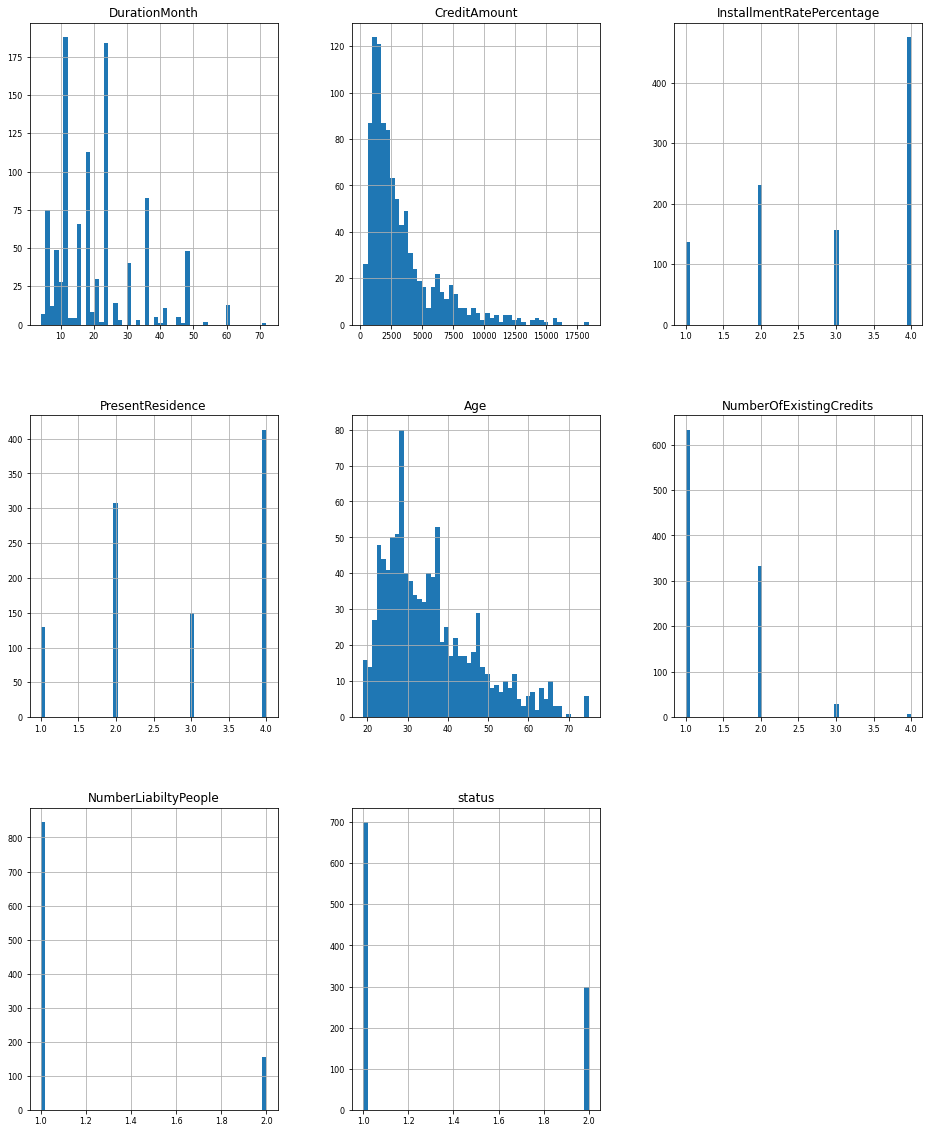

In [7]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### EDA for categorical data

In [8]:
df_cat = df.select_dtypes(include = 'object').copy()
df_cat.head()

,checkingAccount,CreditHistory,Purpose,SavingsAccount/bonds,PresentEmploymentSince,PersonalStatus,OtherDebtors,Property,OtherInstallment,Housing,Job,Telephone,foreignWorker
0,A11,A34,A43,A65,A75,A93,A101,A121,A143,A152,A173,A192,A201
1,A12,A32,A43,A61,A73,A92,A101,A121,A143,A152,A173,A191,A201
2,A14,A34,A46,A61,A74,A93,A101,A121,A143,A152,A172,A191,A201
3,A11,A32,A42,A61,A74,A93,A103,A122,A143,A153,A173,A191,A201
4,A11,A33,A40,A61,A73,A93,A101,A124,A143,A153,A173,A191,A201


In [9]:
df_cat.isnull().sum()

checkingAccount           0
CreditHistory             0
Purpose                   0
SavingsAccount/bonds      0
PresentEmploymentSince    0
PersonalStatus            0
OtherDebtors              0
Property                  0
OtherInstallment          0
Housing                   0
Job                       0
Telephone                 0
foreignWorker             0
dtype: int64

### Data distribution for the categorical attributes

<AxesSubplot:xlabel='Job', ylabel='count'>

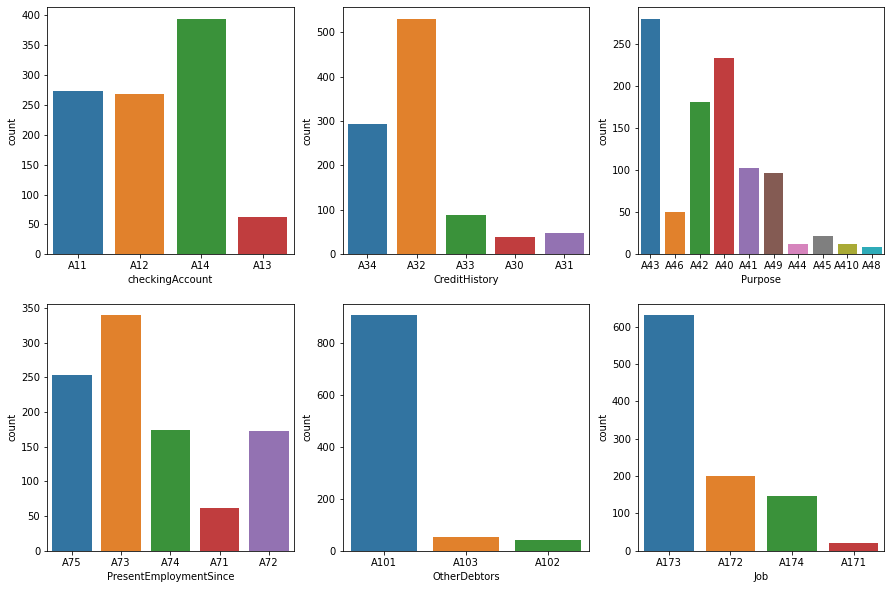

In [10]:
fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = df_cat, x = 'checkingAccount', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = df_cat, x = 'CreditHistory', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.countplot(data = df_cat, x = 'Purpose', ax=ax3)

ax4 = fig.add_subplot(2,3,4)
sns.countplot(data = df_cat, x = 'PresentEmploymentSince', ax=ax4)

ax5 = fig.add_subplot(2,3,5)
sns.countplot(data = df_cat, x = 'OtherDebtors', ax=ax5)

ax6 = fig.add_subplot(2,3,6)
sns.countplot(data = df_cat, x = 'Job', ax=ax6)


### EDA for Numeric Data

In [11]:
df_num = df.select_dtypes(include=[np.number])
df_num.head()

,DurationMonth,CreditAmount,InstallmentRatePercentage,PresentResidence,Age,NumberOfExistingCredits,NumberLiabiltyPeople,status
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,2
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,2


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

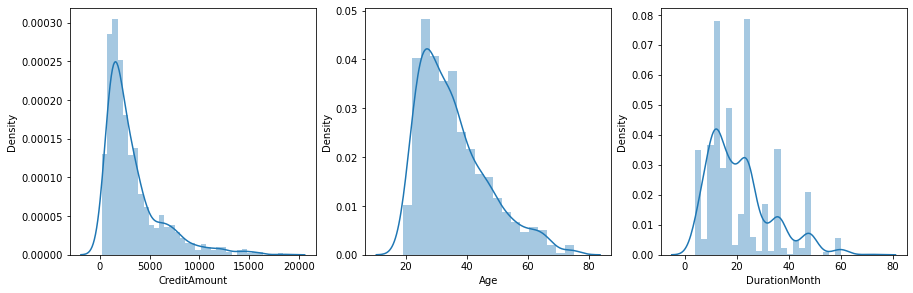

In [12]:
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,3,1)
sns.distplot(df_num['CreditAmount'], ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.distplot(df_num['Age'], ax=ax2)

ax3 = fig.add_subplot(2,3,3)
sns.distplot(df_num['DurationMonth'], ax=ax3)
plt.show()

## Machine Learning Model

### Firstly we'll encode the categorical data. I have used Ordinal Encoder here as it is more efficient and easy to implement.

In [13]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["checkingAccount1"] = ord_enc.fit_transform(df[["checkingAccount"]])
df["CreditHistory1"] = ord_enc.fit_transform(df[["CreditHistory"]])
df["Purpose1"] = ord_enc.fit_transform(df[["Purpose"]])
df["SavingsAccount/bonds1"] = ord_enc.fit_transform(df[["SavingsAccount/bonds"]])
df["PresentEmploymentSince1"] = ord_enc.fit_transform(df[["PresentEmploymentSince"]])
df["PersonalStatus1"] = ord_enc.fit_transform(df[["PersonalStatus"]])
df["OtherDebtors1"] = ord_enc.fit_transform(df[["OtherDebtors"]])
df["OtherInstallment1"] = ord_enc.fit_transform(df[["OtherInstallment"]])
df["Housing1"] = ord_enc.fit_transform(df[["Housing"]])
df["Property1"] = ord_enc.fit_transform(df[["Property"]])
df["foreignWorker1"] = ord_enc.fit_transform(df[["foreignWorker"]])
df["Job1"] = ord_enc.fit_transform(df[["Job"]])

### Dropping the unnecessary columns that are not required for the training also creating 'X' variable and 'Y' to partition the dataset into base attributes and target attribute respectively. 

In [21]:
X = df.drop(columns = ['status','checkingAccount','PersonalStatus','CreditHistory','Purpose','OtherDebtors','SavingsAccount/bonds','PresentEmploymentSince','Job','Housing','OtherInstallment','Telephone','foreignWorker','Property'],axis=1)
Y = df['status']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 175 to 168
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DurationMonth              800 non-null    int64  
 1   CreditAmount               800 non-null    int64  
 2   InstallmentRatePercentage  800 non-null    int64  
 3   PresentResidence           800 non-null    int64  
 4   Age                        800 non-null    int64  
 5   NumberOfExistingCredits    800 non-null    int64  
 6   NumberLiabiltyPeople       800 non-null    int64  
 7   checkingAccount1           800 non-null    float64
 8   CreditHistory1             800 non-null    float64
 9   Purpose1                   800 non-null    float64
 10  SavingsAccount/bonds1      800 non-null    float64
 11  PresentEmploymentSince1    800 non-null    float64
 12  PersonalStatus1            800 non-null    float64
 13  OtherDebtors1              800 non-null    float

### Logistic Regression

In [24]:
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.78


In [32]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.71


#### Test accuracy of 0.71 is pretty decent for the classification problem here.

### Support Vector Machine

In [28]:
svc = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)

In [29]:
X_train_prediction = svc.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.7825


In [30]:
X_test_prediction = svc.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.72


#### Similar accuracy is achieved through SVM, shows are model is well trained and is generalizing the data pretty decently.